# we all should start by importing our libary

# Make sure to install these libaries
- pandas
- sklearn
- seaborn

In [130]:
import pandas as pd
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv("Housing.csv")

In [132]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# so lets do it with more than 1 varbiable

In [133]:
df["guestroom"] = df["guestroom"].map({'yes': 1, 'no': 0})
df["mainroad"] = df["mainroad"].map({'yes': 1, 'no': 0})
df["basement"] = df["basement"].map({'yes': 1, 'no': 0})
df["hotwaterheating"] = df["hotwaterheating"].map({'yes': 1, 'no': 0})
df["airconditioning"] = df["airconditioning"].map({'yes': 1, 'no': 0})
df["prefarea"] = df["prefarea"].map({'yes': 1, 'no': 0})
df["furnishingstatus"] = df["furnishingstatus"].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [134]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [135]:
df.corr().sort_values(by='price', ascending=False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
parking,0.384394,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.177539
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
prefarea,0.329777,0.234779,0.079023,0.063472,0.044425,0.199876,0.160897,0.228083,-0.059411,0.117382,0.091627,1.000000,0.107686
furnishingstatus,0.304721,0.171445,0.123244,0.143559,0.104672,0.156726,0.118328,0.112831,0.031628,0.150477,0.177539,0.107686,1.000000
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726


<Axes: >

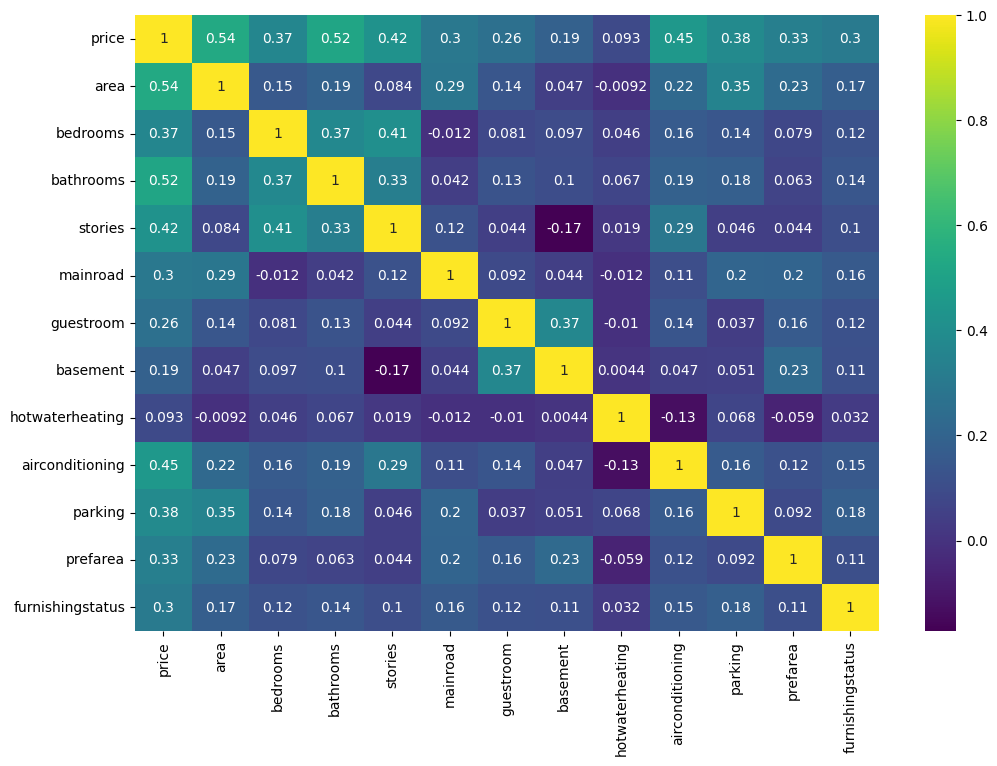

In [136]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='viridis')


seems like the one with the high amount of correlation

In [137]:
x = df[["area","bathrooms","airconditioning","stories","parking","bedrooms","prefarea","mainroad"]]
y = df[["price"]]

# we should use this so we can train our model by using train test split first

In [138]:
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=0)

# import sklearn linear regression model

In [139]:
model = lm.LinearRegression()

# fit the data

In [140]:
model.fit(X_train, y_train)

LinearRegression()

# see the prediction might be not accurate at all

In [141]:
model.predict(X_test)

array([[ 3917876.05104741],
       [ 6053835.16201989],
       [ 4577461.15562669],
       [ 5620508.88051111],
       [ 3246554.24148666],
       [ 6609146.83416933],
       [ 3783097.55153753],
       [ 3277033.94992061],
       [ 4026857.73068438],
       [ 8444428.5282602 ],
       [ 7118950.31785969],
       [ 3620126.43931663],
       [ 3492630.10940606],
       [ 3760081.84865482],
       [ 3741332.38837386],
       [ 2341762.12787728],
       [ 3642848.18836542],
       [ 3750082.13650497],
       [ 2894286.78491612],
       [ 4603381.01921042],
       [ 5419015.29214427],
       [ 4994027.52577569],
       [ 4750178.58692321],
       [ 3055142.70285017],
       [ 5448417.34792787],
       [ 5039110.90512367],
       [ 5398854.01620479],
       [ 5207923.59305157],
       [ 5728028.15616381],
       [ 5548418.02258064],
       [ 3420572.20754436],
       [ 5282256.8081103 ],
       [ 7003933.05168888],
       [ 3330574.79819572],
       [ 2899286.64099105],
       [ 5376116.958

# well is not the best but its an easy example to see

In [142]:
model.score(X_test, y_test)

0.6821894553458578

# just keep trying until you get a good score

In [ ]:
data = np.array([[7420,2,1,3,2,4,1,1]])
output = model.predict(data)
output

C:\Users\wilsen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[8492689.55267896]])

: 